# Pandas

* Series
  - 1차원 배열 구조를 가지며, 인덱스(index)를 가진다.
  - dtype 속성과 shape 속성 등을 가진다

* Data Frame
  - series 를 모은 것

In [ ]:
import pandas as pd

## 1차원 (Series)

In [ ]:
ser = pd.Series([1, 2, 3], index = ['a', 'a', 'c']) # 동일한 idx 를 가지기도 함.
ser

a    1
a    2
c    3
dtype: int64

### loc, iloc

In [ ]:
ser.loc['a'] # 'a' 인덱스를 가지는 값을 가져옴

a    1
a    2
dtype: int64

In [ ]:
ser = pd.Series([1, 2, 3], index = ['a', 'b', 'c'])
ser.loc['b':'c'] # key값으로만 찾아옴. (iloc과 다르게)

b    2
c    3
dtype: int64

In [ ]:
ser.loc[['a', 'c']] # parameter 하나만. ex) loc['a', 'c'] -> (X)

a    1
c    3
dtype: int64

In [ ]:
ser.iloc[0] # index로 값을 찾아옴. (loc과 다르게)

1

### 논리식 활용

In [ ]:
ser.loc[[True, False, True]]

a    1
c    3
dtype: int64

In [ ]:
ser != 2 # 2와 같지 않으면 -> True. 즉, 2와 같지 않은 것을 True 로, 2인것을 False 로 출력

a     True
b    False
c     True
dtype: bool

In [ ]:
ser.loc[ser != 2] # 2와 같지 않으면 -> True. 즉, 2와 같지 않은 것을 출력

a    1
c    3
dtype: int64

## 2차원 (DataFrame)

In [ ]:
data = [[1, 10, 100], [2, 20, 200], [3, 30, 300]] #, 시리즈 : [1, 10, 100], [2, 20, 200], [3, 30, 300]
df = pd.DataFrame(data)
df

,0,1,2
0,1,10,100
1,2,20,200
2,3,30,300


In [ ]:
df = pd.DataFrame(data, index=['r1', 'r2', 'r3'], columns=['c1', 'c2', 'c3'])
df

,c1,c2,c3
r1,1,10,100
r2,2,20,200
r3,3,30,300


### loc

In [ ]:
df.loc['r1']

c1      1
c2     10
c3    100
Name: r1, dtype: int64

In [ ]:
df.loc['r1',:] # 이런 방식으로 쓰기

c1      1
c2     10
c3    100
Name: r1, dtype: int64

In [ ]:
df.loc['r1', 'c2']

10

In [ ]:
df.loc[:, 'c2']

r1    10
r2    20
r3    30
Name: c2, dtype: int64

In [ ]:
df.loc['r2':'r3', 'c2':'c3'] # 범위
df.loc[['r2', 'r3'], 'c2':'c3'] # element

,c2,c3
r2,20,200
r3,30,300


In [ ]:
df.loc[['r1', 'r3'], ['c1', 'c3']]

,c1,c3
r1,1,100
r3,3,300


### 조건식 활용

In [ ]:
df > 10

,c1,c2,c3
r1,False,False,True
r2,False,True,True
r3,False,True,True


In [ ]:
df.loc[df['c2'] > 10]
# df > 10 했을 때, c2 시리즈에서 True 인 것은 r2, r3 idx.
# 따라서 r2, r3 출력

,c1,c2,c3
r2,2,20,200
r3,3,30,300


In [ ]:
# And : &
# Or : |

df.loc[(df['c1']>1) & (df['c3']<300)]

,c1,c2,c3
r2,2,20,200


## 샘플 데이터 활용

* read_csv
  - index_col
  - dtype
  - parse_date

In [ ]:
path = './sample/anime.csv'
df = pd.read_csv(path) # csv 파일을 불러옴
# index_col = 'a', 'a' columns 을 idx 로 쓰겠다.
df.head(3) # 데이터 몇 개만 대표로 보여줌. default = 5

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262


In [ ]:
df = pd.read_csv(path, index_col = 'anime_id', dtype = {'ratings':int}) # csv 파일을 불러옴
# index_col = 'a', 'a' columns 을 idx 로 쓰겠다.
# dtype : 특정 columns 의 data type 을 바꿈.
df.head(3) # 데이터 몇 개만 대표로 보여줌. default = 5

,name,genre,type,episodes,rating,members
anime_id,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262


In [ ]:
df.dtypes

name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object

In [ ]:
path = './sample/anime_stock_returns.csv'
df = pd.read_csv(path, parse_dates=['Date'])
# parse_dates=['Date'] : 'Date' 칼럼을 날짜 타입으로 바꿈
df.head()

,Date,TOEI ANIMATION,IG Port
0,2015-01-01,1.000000,1.000000
1,2015-01-02,1.000000,1.000000
2,2015-01-05,1.011695,1.014082
3,2015-01-06,1.001463,1.000000
4,2015-01-07,0.982457,1.000824


In [ ]:
df.dtypes

Date              datetime64[ns]
TOEI ANIMATION           float64
IG Port                  float64
dtype: object

# Pandas + Matplotlib

In [ ]:
import pandas as pd

path = './sample/anime_stock_returns.csv' # TOEI, IG 회사의 종가 데이터들
df = pd.read_csv(path, index_col='Date', parse_dates=['Date'])
# df = pd.read_csv(path, index_col=0, parse_dates=['Date'])
df.head()

,TOEI ANIMATION,IG Port
Date,,
2015-01-01,1.000000,1.000000
2015-01-02,1.000000,1.000000
2015-01-05,1.011695,1.014082
2015-01-06,1.001463,1.000000
2015-01-07,0.982457,1.000824


In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,475 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

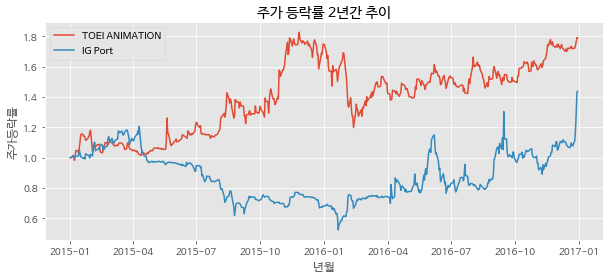

In [ ]:
import matplotlib.pyplot as plt


plt.style.use('ggplot')

plt.rc('font', family='NanumBarunGothic')

fig = plt.figure(figsize = (10, 4))
ax = fig.add_subplot(111) # 지정해주기 위해 따로 변수로 빼줌
ax.plot(df.index, df['TOEI ANIMATION'], label = 'TOEI ANIMATION') # x: df.index, y : df['...']
ax.plot(df.index, df['IG Port'], label = 'IG Port') # x: df.index, y : df['...']

ax.set_title('주가 등락률 2년간 추이')
ax.set_xlabel('년월')
ax.set_ylabel('주가등락률')
ax.legend() # 범례

plt.show()

### 막대 그래프 bar() 함수

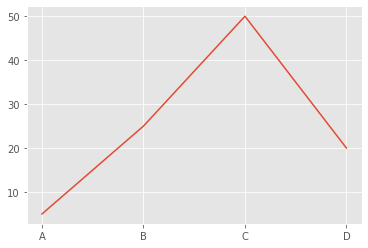

In [ ]:
import matplotlib.pyplot as plt
x = ['A', 'B', 'C', 'D']
y = [5., 25., 50., 20.]
plt.plot(x, y)
plt.show()

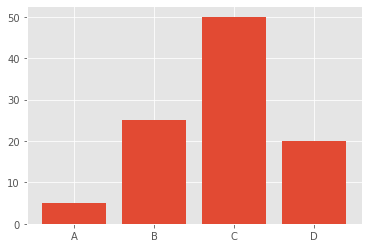

In [ ]:
x = ['A', 'B', 'C', 'D']
y = [5., 25., 50., 20.]
plt.bar(x, y)
plt.show()

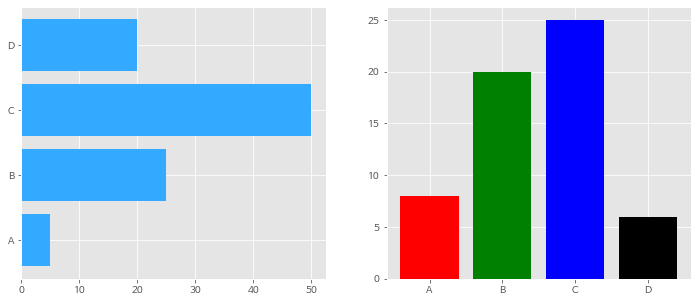

In [ ]:
x = ['A', 'B', 'C', 'D']
y1 = [5., 25., 50., 20.]
y2 = [8., 20., 25., 6.]

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 5) # 

ax[0].barh(x, y1, color = '#33aaff') # .barh : 가로 그래프
ax[1].bar(x, y2, color = ['r', 'g', 'b', 'k'])

plt.show()

## 두개의 축을 가진 그래프 그리기

In [ ]:
path = './sample/4816.csv'
df = pd.read_csv(path, index_col=0, parse_dates=['Date'])
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,1600.0,1600.0,1580.0,1597.0,5600.0
2010-01-05,1597.0,1605.0,1590.0,1600.0,14800.0
2010-01-06,1600.0,1602.0,1579.0,1601.0,8300.0
2010-01-07,1600.0,1600.0,1590.0,1595.0,3700.0
2010-01-08,1599.0,1601.0,1595.0,1600.0,32300.0


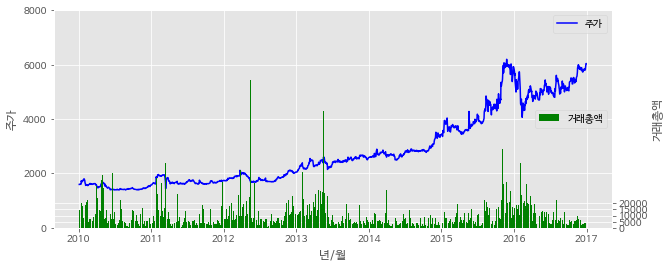

In [ ]:
fig = plt.figure(figsize = (10, 4))
ax1 = fig.add_subplot(111) # 1개짜리,
ax1.plot(df.index, df['Close'], color='b', label='주가')

ax2 = ax1.twinx() # ax1 를 복제, y축 단위가 다름
ax2.bar(df.index, df['Volume'], color='g', label='거래총액', width=2)

ax1.legend()
ax2.legend(loc=5)

ax1.set_xlabel('년/월')
ax1.set_ylabel('주가')
ax1.set_yticks([i * 2000 for i in range(5)]) # 0, 2000, 4000, 8000, 10000

#ax2.set_xlabel('년/월')
ax2.set_ylabel('거래총액')
ax2.set_yticks([i * 5000 for i in range(5)])

plt.show()

## 산점도 Scatter()

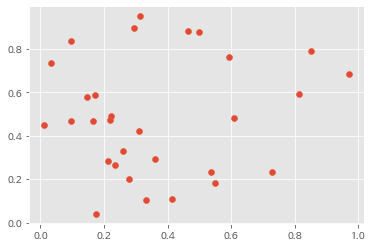

In [ ]:
import numpy as np

x = np.random.rand(30)
y = np.random.rand(30)
plt.scatter(x, y)
plt.show()

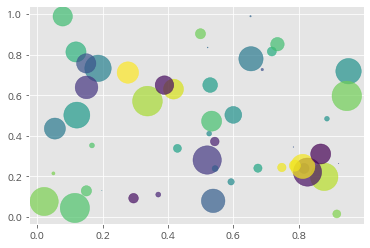

In [ ]:
n = 50
x = np.random.rand(n)
y = np.random.rand(n)

area = (30 * np.random.rand(n)) ** 2
area

colors = np.random.rand(n)

plt.scatter(x, y, s=area, c=colors, alpha=0.7)
# s : size, c : color, alpha : 불투명도
plt.show()

In [ ]:
path = './sample/anime_master.csv'

df = pd.read_csv(path, index_col='anime_id')
df.head()

,name,genre,type,episodes,rating,members
anime_id,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
9969,Gintama',"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


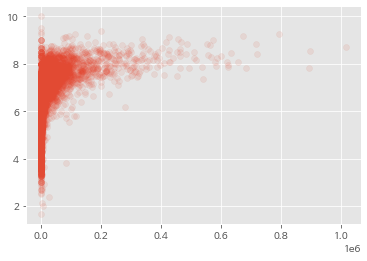

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(df['members'], df['rating'], alpha = 0.1)
# -> 관객수도 높고 별점도 만점인것은 별로 없다.

plt.show()

## pd

In [ ]:
# members 가 80만 이상인 것을 불러오기
df.loc[df['members'] >= 800000, ['name', 'members']] # [name, members] 필드만 출력

,name,members
anime_id,,
1535,Death Note,1013917
16498,Shingeki no Kyojin,896229
11757,Sword Art Online,893100


In [ ]:
# members 가 60만 이상, 평점이 8.5 이상인 작품
df.loc[(df['members'] >= 600000) & (df['rating'] >= 8.5), ['name', 'rating']]

,name,rating
anime_id,,
5114,Fullmetal Alchemist: Brotherhood,9.26
9253,Steins;Gate,9.17
1575,Code Geass: Hangyaku no Lelouch,8.83
1535,Death Note,8.71
16498,Shingeki no Kyojin,8.54


### 분류

In [ ]:
types = df['type'].unique()
types

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA'], dtype=object)

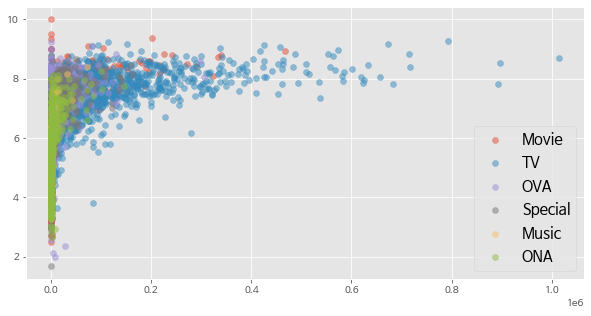

In [ ]:
# type 별로 색상을 다르게 해서 산점도 그리기
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(111)

for t in types:
  x = df.loc[df['type'] == t, 'members']
  y = df.loc[df['type'] == t, 'rating']
  ax.scatter(x, y, alpha=0.5, label=t)

ax.legend(loc='lower right', fontsize=15)
plt.show()